In [1]:
# Simple Anomaly Detection Script
# Based off of Andrew Ng's Machine Learning Course, Week 9/Lecture 15.1,2,3

# By Alexander Ahmann (@mathmare_)

# There's probably a better way to write this :P

import numpy as np

calc_gaussian = lambda x, mu, sigma: (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp( -(x - mu)**2 / (2 * sigma**2) )
calc_average = lambda x: (1.0 / len(x)) * sum(x)
calc_variance = lambda x, mu: (1.0 / (len(x)-1)) * sum([(k - mu)**2 for n, k in enumerate(x)])
calc_std = lambda ssq: np.sqrt(ssq)

training_statistical_dataset = {
    "vibration":[56,59,52,49,49,51,48,50,53,44],
    "heat":[47,61,52,41,49,49,56,46,60,51]
}
training_features_parameters = { }

epsilon = 0.0025

if __name__ == '__main__':
    # Train the model given each features
    for k in training_statistical_dataset.keys():
        parameters = []
        label = k
        average = calc_average(training_statistical_dataset[k])
        parameters.append(average) #in parameters[0]
        variance = calc_variance(training_statistical_dataset[k], average)
        parameters.append(variance) #in parameters[1]
        std = calc_std(variance)
        parameters.append(std) #in parameters[2]
        training_features_parameters[label] = parameters
    
    print("Anomaly Detection Programme")
    print("===========================\n")

    done = False
    while not done:
        # Now, ask for test cases to work out anomolies
        print("What do you want to do?")
        print("1. Input a test data point")
        print("2. Exit\n")
        
        option = input("Enter number of option: ")

        if option == "1":
            probability = 1
            for k in training_features_parameters.keys():
                test_case = float(input("Enter in test case for " + k + ": "))
                mean = training_features_parameters[k][0]
                std = training_features_parameters[k][2]
                probability = probability * calc_gaussian(test_case, mean, std)
            if probability < epsilon:
                print("\nAnomaly,", probability, "<", epsilon, "\n")
            else:
                print("\nNo Anomaly,", probability, "is not <", epsilon, "\n")

        elif option == "2":
            done = True
        else:
            print("Please enter in either \"1\" or \"2\"")

Anomaly Detection Programme

What do you want to do?
1. Input a test data point
2. Exit

Enter number of option: 1
Enter in test case for vibration: 3
Enter in test case for heat: 4

Anomaly, 2.702906125209619e-43 < 0.0025 

What do you want to do?
1. Input a test data point
2. Exit

Enter number of option: 3
Please enter in either "1" or "2"
What do you want to do?
1. Input a test data point
2. Exit

Enter number of option: 2


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
data = {
    "vibration":[56,59,52,49,49,51,48,50,53,44],
    "heat":[47,61,52,41,49,49,56,46,60,51]
}
df = pd.DataFrame(data)
df

,heat,vibration
0,47,56
1,61,59
2,52,52
3,41,49
4,49,49
5,49,51
6,56,48
7,46,50
8,60,53
9,51,44


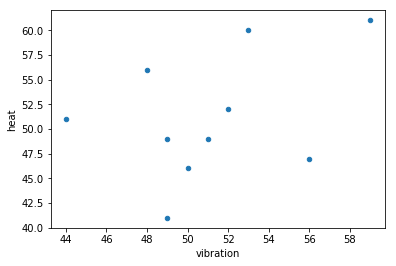

In [9]:
df.plot.scatter('vibration', 'heat')

In [10]:
vm, vs = df.vibration.mean(), df.vibration.std()
vm, vs

(51.1, 4.2282121254470875)

In [11]:
hm, hs = df.heat.mean(), df.heat.std()
hm, hs

(51.2, 6.285786435372356)

In [12]:
calc_gaussian = lambda x, mu, sigma: (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp( -(x - mu)**2 / (2 * sigma**2) )

In [13]:
test_case = [3,4]
probability = 1
probability = probability * calc_gaussian(test_case[0], vm, vs)
probability = probability * calc_gaussian(test_case[1], hm, hs)
probability

2.702906125209619e-43

In [14]:
#s = np.random.normal(mu, sigma, 1000)

In [15]:
calc_gaussian(3, vm, vs)

7.467249702360067e-30

In [17]:
import scipy.stats
scipy.stats.norm(vm, vs).pdf(3)

7.467249702359961e-30